### 1. Import Libraries and Data

In [1]:


import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 
quandl.ApiConfig.api_key = 'Zj-Uzb17QA-yYhzNyjFv'

warnings.filterwarnings("ignore") 

plt.style.use('fivethirtyeight')



In [2]:
#set path
path = r'C:\Users\beatr\Documents\27_06_2023-Boat_Marketing'

In [3]:
#import data set
df_boats = pd.read_pickle(os.path.join(path, '02-Data', 'Prepared', 'Boats_Explored.pkl'))

In [4]:
#check shape of data
df_boats.shape

(9192, 15)

### 3. Make a subset of your data set if necessary.
- Making a subset is not neccesary 
- we do need to select a median price for each year though

### 4. Create a line chart of your data.

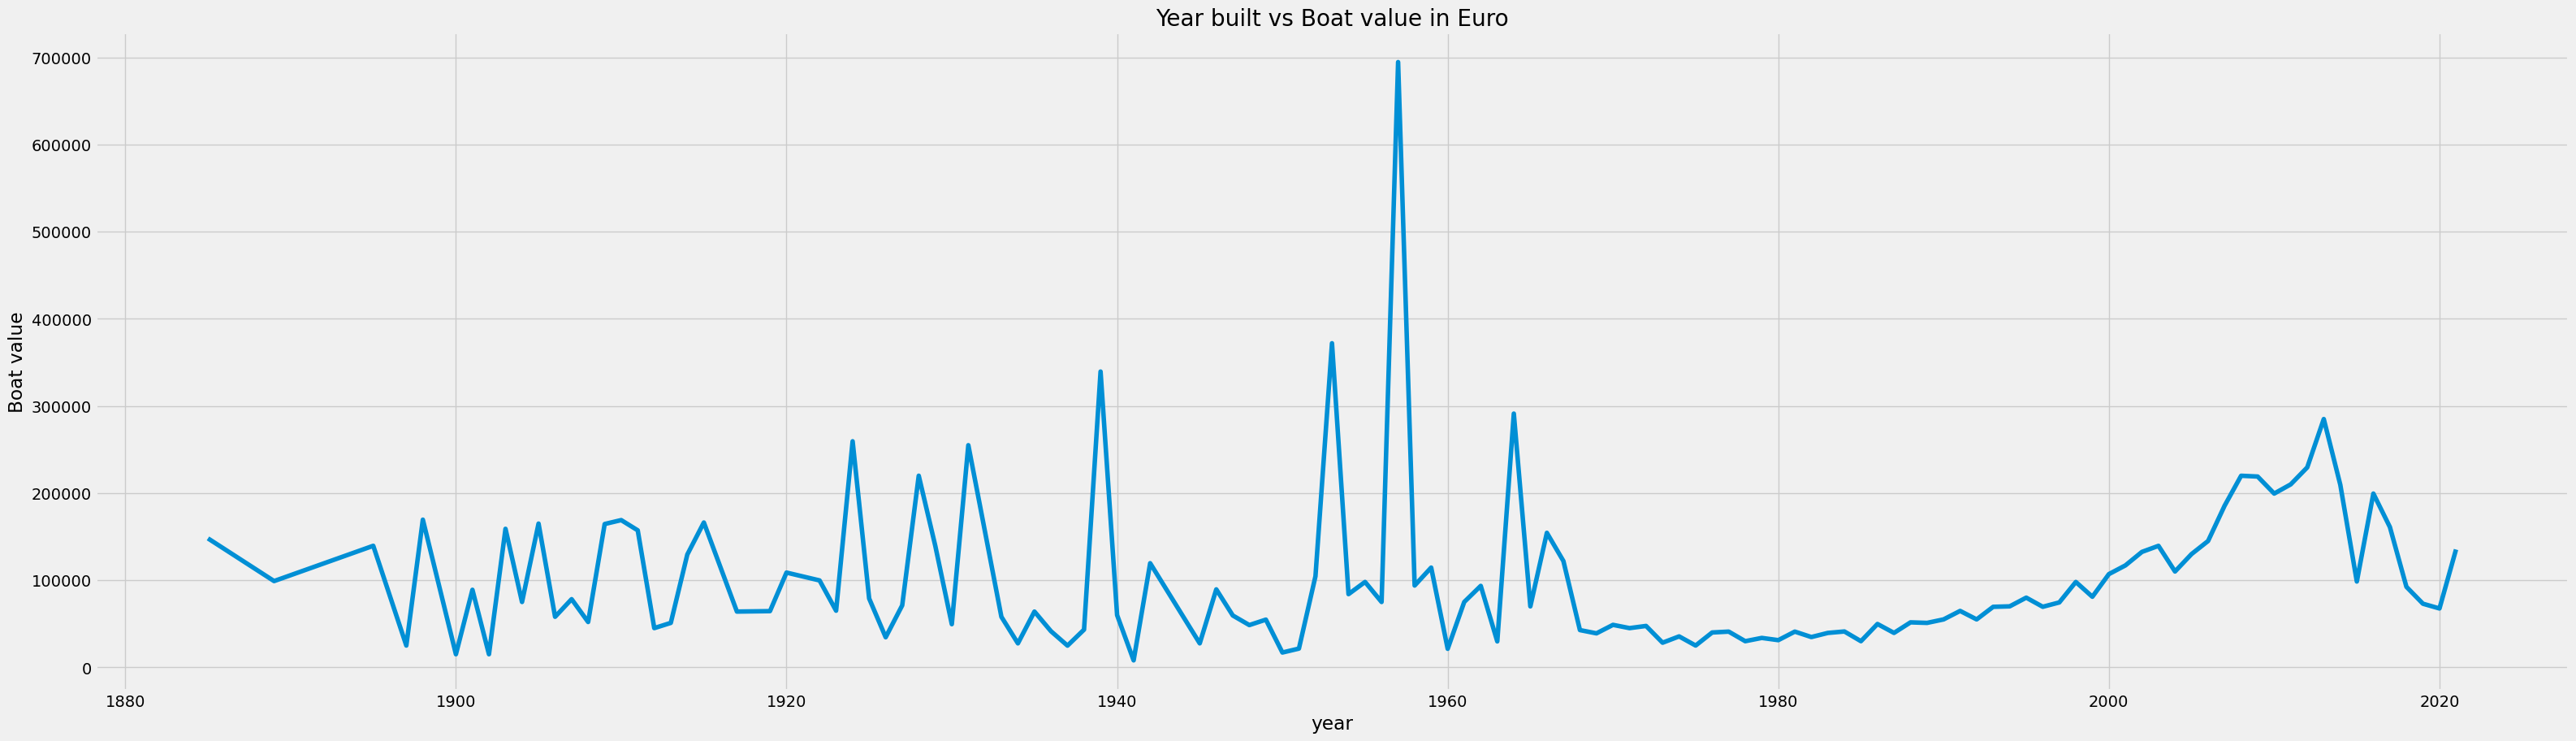

In [10]:
# Group by the year built and the median value of boat in euro

df_yearly_price = df_boats.groupby("year_built").agg({"value_in_eur":["median"]})

figure_1 = plt.figure(figsize = (35,10), dpi = 100)
plt.title("Year built vs Boat value in Euro" )
plt.xlabel("year")
plt.ylabel("Boat value")
plt.plot(df_yearly_price)

figure_1.figure.savefig(os.path.join(path, '03-Analysis','Visualizations', 'timeseries.png'))

- No need to select specfic markers

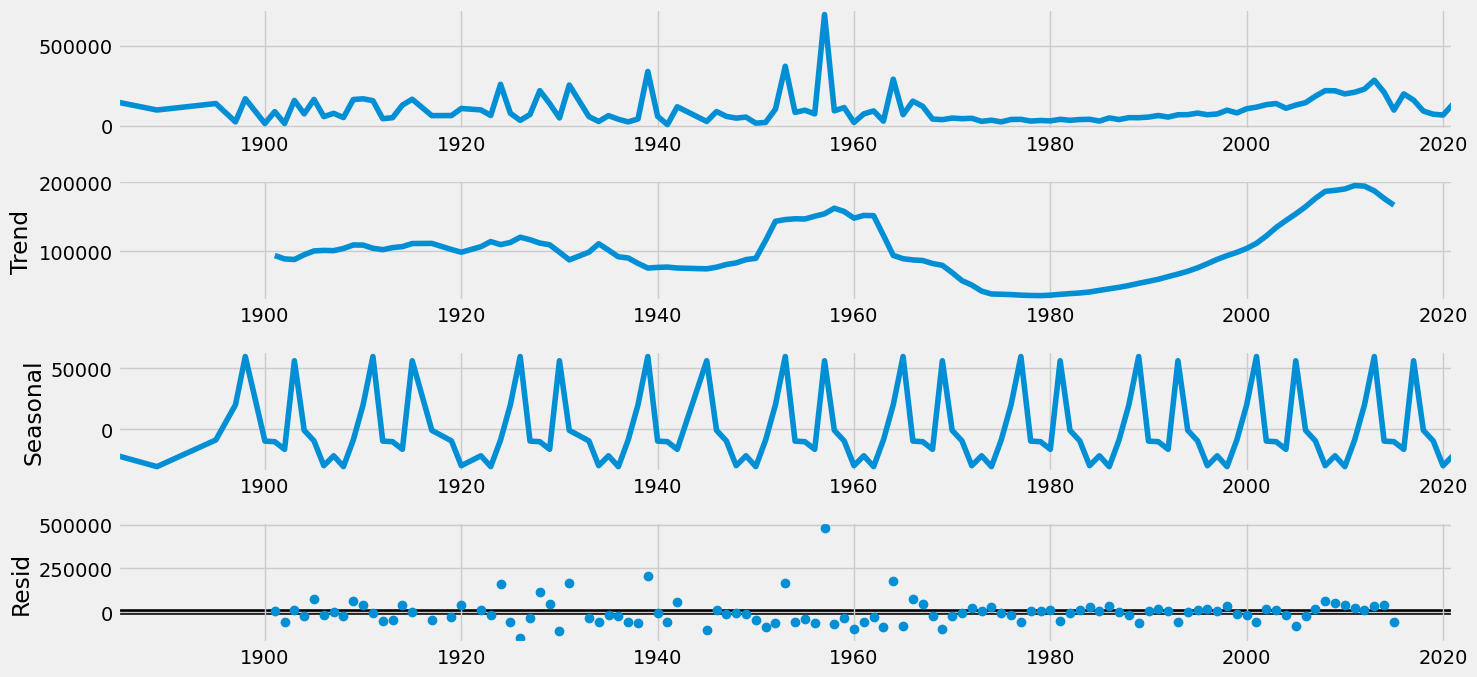

AttributeError: 'DecomposeResult' object has no attribute 'figure'

In [6]:
### 5. Decompose the data’s components.

#set the index frequency
df_yearly_price.index.freq = 'M'

# use a additive model to decompose the data
decomposition = sm.tsa.seasonal_decompose(df_yearly_price, model ='additive', period = 12)

from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 15, 7
decomposition.plot()
plt.show()



#### The presence of the trend and seasonality implies that the data is non stationary

- There is noice in the dataset
- we see a upward trent in boat price between 1940-1959
- 1959 the markets for boats crashed and price decreased until 1980
- In the 1980's we see the price steadily increase again
- This could be due to demand of boats
- This trend continued up until 2016

### 6. Conduct a Dickey-Fuller test to check for stationarity.






In [7]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag = 'AIC')
    result = pd.Series(test[0:4], index = ['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_yearly_price['value_in_eur'])


Dickey-Fuller Stationarity test:
Test Statistic                  -2.783676
p-value                          0.060644
Number of Lags Used              7.000000
Number of Observations Used    113.000000
Critical Value (1%)             -3.489590
Critical Value (5%)             -2.887477
Critical Value (10%)            -2.580604
dtype: float64


#### P value > 0.005 & Critical value 5% < Test Statistic 
- Therefore, we can not reject the null hypothesis
- There is a unit root in the data
- Data is non-stationary

#### Check out the autocorrelation between lags for Boat yearly prices

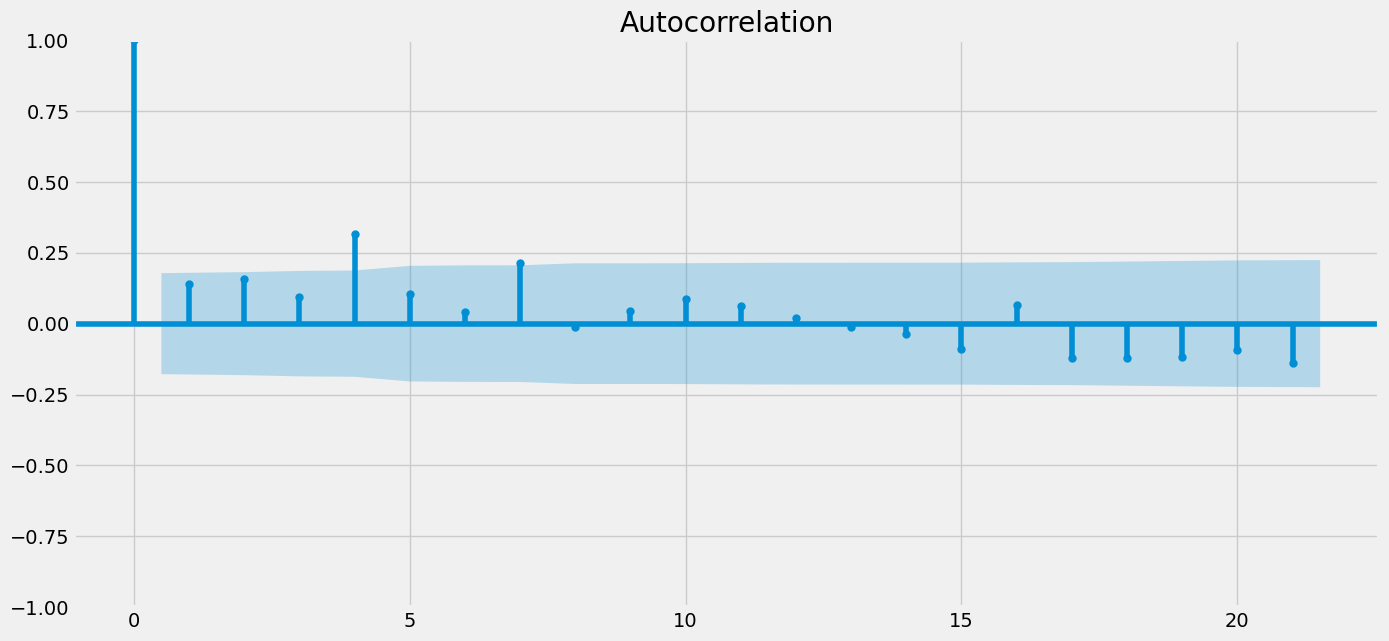

In [12]:


from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

figure_2 = plot_acf(df_yearly_price)
plt.show()

figure_2.figure.savefig(os.path.join(path, '03-Analysis','Visualizations', 'autocorrelation.png'))

### 7/8/9 Data isn’t stationary, conduct a round of differencing

Dickey-Fuller Stationarity test:
Test Statistic                -7.486008e+00
p-value                        4.637235e-11
Number of Lags Used            5.000000e+00
Number of Observations Used    1.140000e+02
Critical Value (1%)           -3.489058e+00
Critical Value (5%)           -2.887246e+00
Critical Value (10%)          -2.580481e+00
dtype: float64


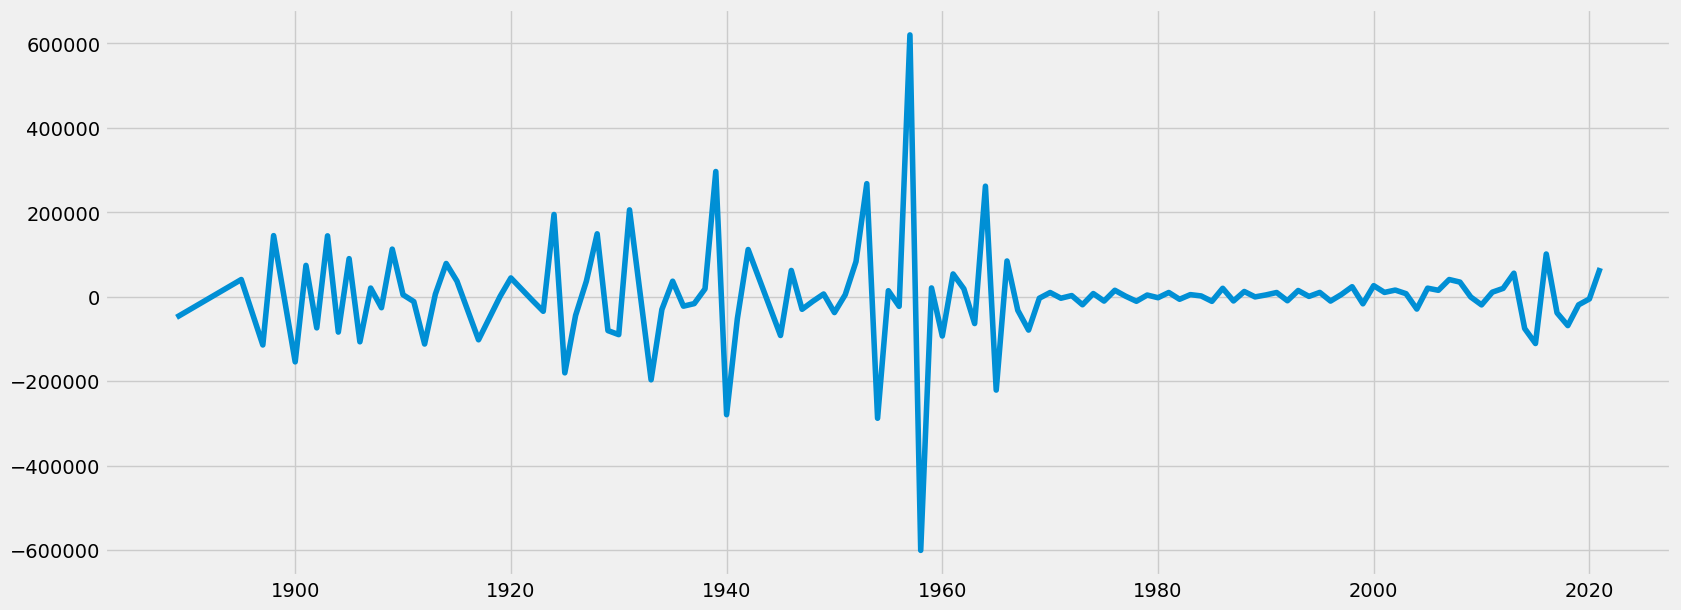

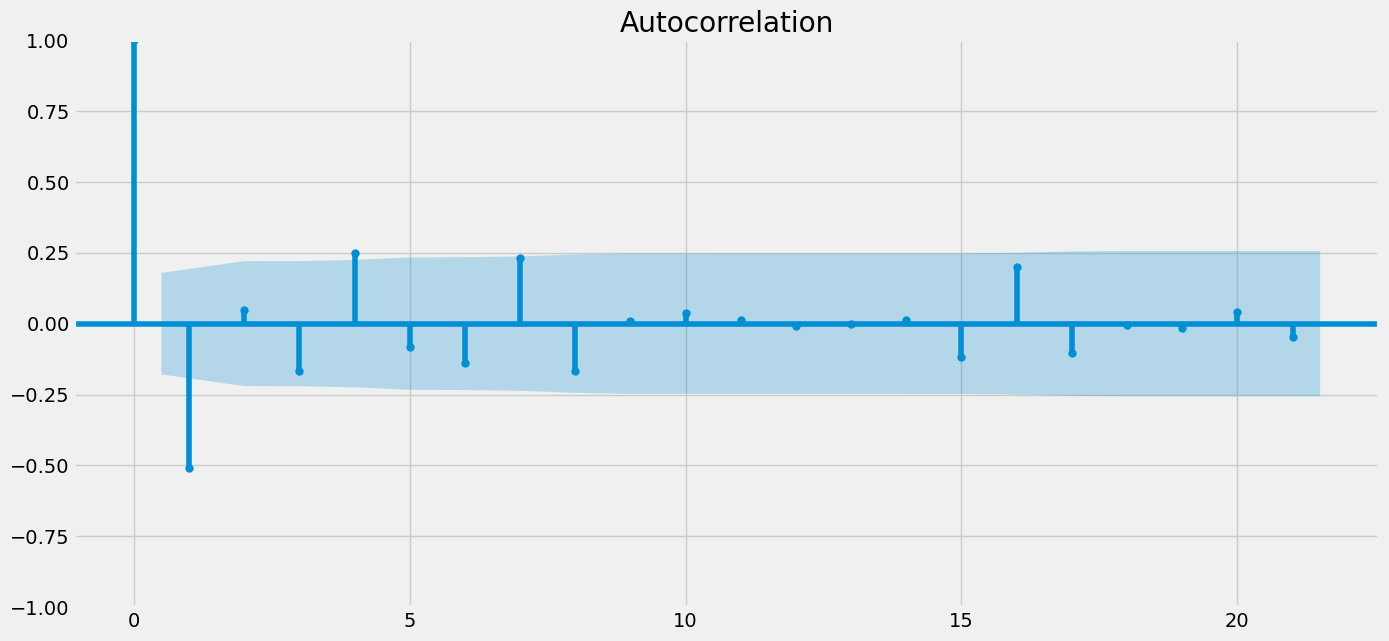

In [9]:
# Data is non-stationary


#Differencing data
data_diff = df_yearly_price - df_yearly_price.shift(1) 
data_diff.dropna(inplace = True) 
plt.figure(figsize=(18,7), dpi=100) 
plt.plot(data_diff) 
dickey_fuller(data_diff) 
plot_acf(data_diff) 
plt.show()



- Test statistic is now lower that critical value 1% 
- p-value is lower than 0,05 and we can reject the nul hypothesis